<a href="https://colab.research.google.com/github/shashank6341/Big-Data-Team-12/blob/master/Team_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team 12 Notebook - Diabetes Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing Libraries

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# 2. Read and print data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BDA Project/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 2.1. Information about the datatypes of each feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Converting type of age column to int

df['age'] = df['age'].astype(int)

In [ ]:
df['diabetes'].unique()

array([0, 1])

# 2.2. Describe features

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# 3. Pre-processing Steps

In [ ]:
# Checking Null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Checking unique values for gender column
print("Gender unique values (Before): ",df['gender'].unique())

# Removing the rows which has Others in gender column
df = df[df['gender']!='Other']

print("Gender unique values (After): ",df['gender'].unique())

Gender unique values (Before):  ['Female' 'Male' 'Other']
Gender unique values (After):  ['Female' 'Male']


In [ ]:
# Removing the data points with age = 0
df = df[df['age']!=0]

In [ ]:
# Printing the unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column gender: ['Female' 'Male']
Unique values in column age: [80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25 33 16 61 31  8 49 39 65 14 70 48 51
 71 64 63 52 10 35 23  1]
Unique values in column hypertension: [0 1]
Unique values in column heart_disease: [1 0]
Unique values in column smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Unique values in column bmi: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
Unique values in column HbA1c_level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
Unique values in column blood_glucose_level: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
Unique values in column diabetes: [0 1]


### 3.1. Check and remove duplicates

In [ ]:
# No. of duplicate rows in the dataset
print(f"Duplicates in the Dataset (Before duplicate removal): {df.duplicated().sum()}")
print("\n")

df = df.drop_duplicates()

print(f"Duplicates in the Dataset (After duplicate removal): {df.duplicated().sum()}")

Duplicates in the Dataset (Before duplicate removal): 3877


Duplicates in the Dataset (After duplicate removal): 0


### 3.2. One hot encoding

In [ ]:
# df['smoking_history']=df['smoking_history'].map({'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5})
# df['gender']=df['gender'].map({'Female':0,'Male':1})

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


### 3.2. Diabetic vs Non-Diabetic Ratio

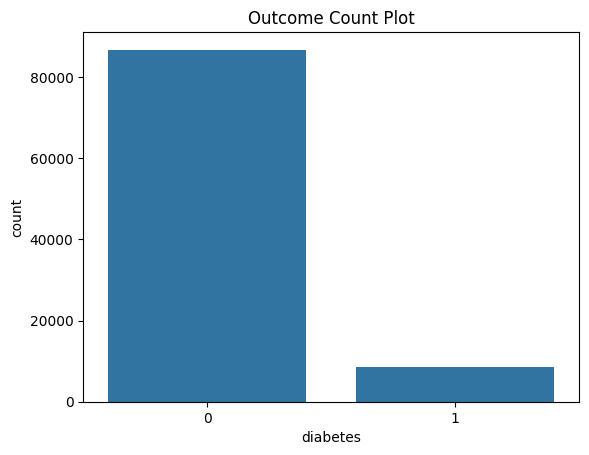

In [ ]:
sns.countplot(x='diabetes', data=df)
plt.title('Outcome Count Plot')
plt.show()

The above graph cleary indicates that this dataset is biased. Using SMOTE (SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE) - FOR BALANCE dataset

In [ ]:
# # Performing SMOTE
# y = df['diabetes']
# X = df.drop(columns = ['diabetes'])
# # Initial class distribution
# print("Class distribution before SMOTE:")
# print(y.value_counts())

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X, y = smote.fit_resample(X, y)

# # Class distribution after SMOTE
# print("\nClass distribution after SMOTE:")
# print(pd.Series(y).value_counts())

In [ ]:
# df = pd.concat([X, y], axis=1)

# sns.countplot(x='diabetes', data=df)
# plt.title('Outcome Count Plot')
# plt.show()

In [ ]:
# # Checking null values
# df.isnull().sum()

In [ ]:
# # Checking duplicate values and remove it
# print(f"No. of Duplicates in the Dataset : {df.duplicated().sum()}")
# df = df.drop_duplicates()
# print(f"No. of Duplcate rows after deleting duplicate rows: {df.duplicated().sum()}")

# 4. Exploratory Data Analysis (EDA)

### 4.1 Gender Countplot

<ipython-input-19-977ee45da0d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


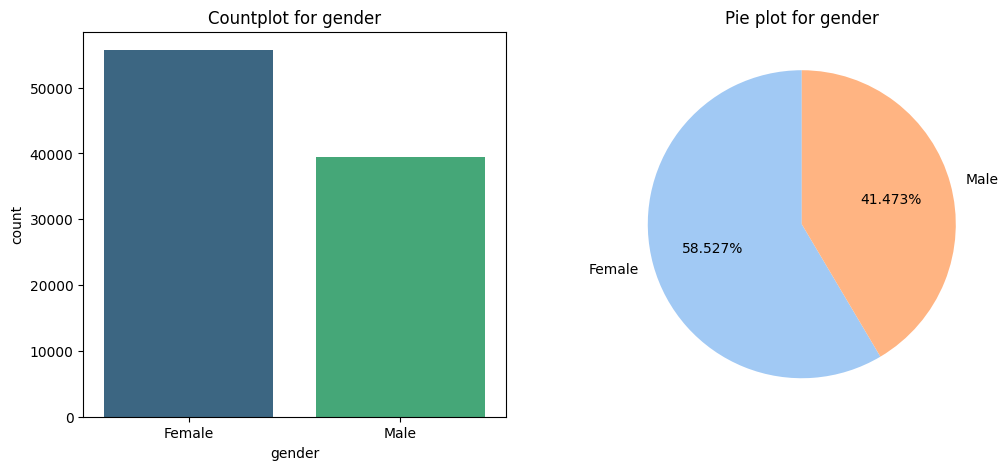

In [ ]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')

    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')

    plt.show()

# df['smoking_history']=df['smoking_history'].map({0:'No Info',1:'never',2:'former',3:'current',4:'not current',5:'ever'})
# df['gender']=df['gender'].map({0:'Female',1:'Male'})

# for col in ['gender','smoking_history']:
#     print(f' Univariate analysis for {col} column:')
univariate_analysis_cat('gender')

### 4.2 Smoking History Countplot

<ipython-input-19-977ee45da0d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


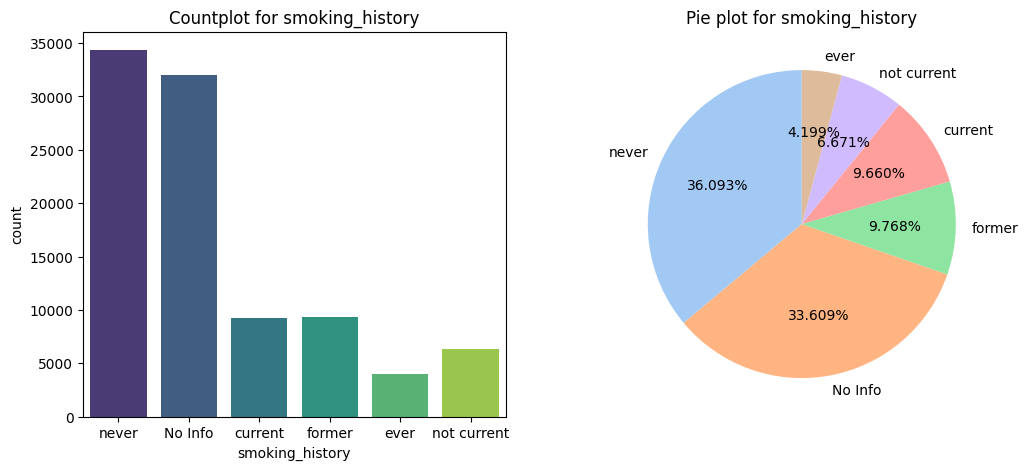

In [ ]:
univariate_analysis_cat('smoking_history')

### 4.3 Gender records distribution.

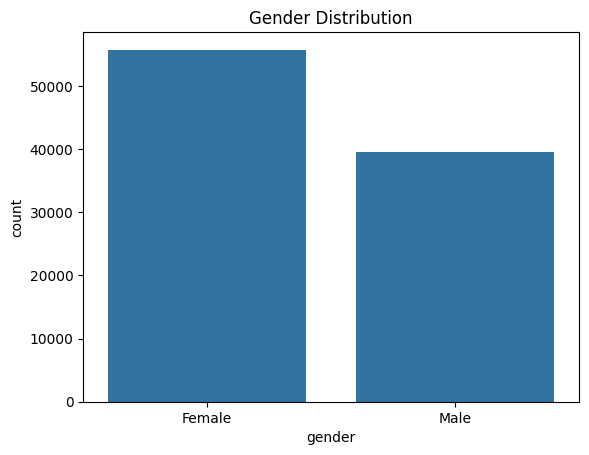

In [ ]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

### 4.4 HbA1c_level vs Diabetes Status

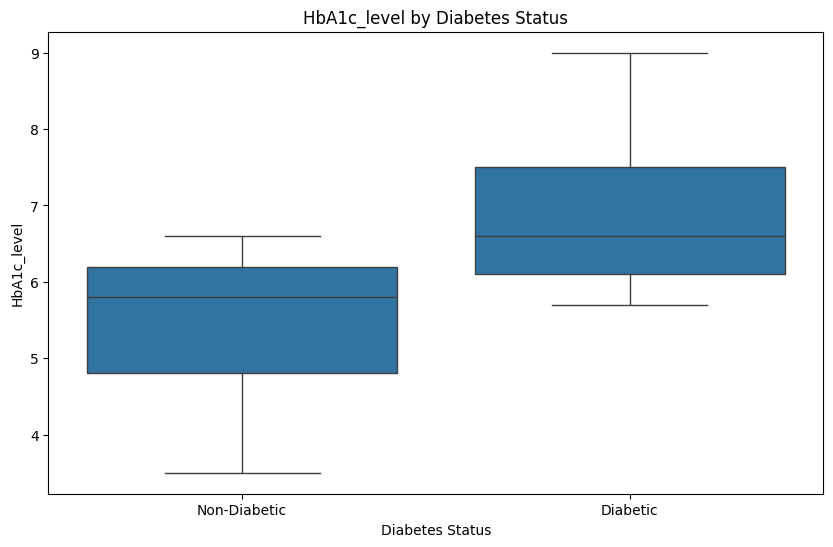

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

# Interpretation of the Graph Below:
#
# Here the boxplot consists of a box and whiskers extending from the box.
# box represents the interquartile range (IQR), which contains the middle 50% of the data
# The line inside each box represents the median value of HbA1c level for each category of diabetes status (non-diabetic and diabetic).
# Values above the median for the non-diabetic category in the boxplot would indicate HbA1c levels that are higher than the median HbA1c
# level observed among non-diabetic individuals in the dataset. This suggests that there are some non-diabetic individuals with elevated
# HbA1c levels, potentially indicating irregulated glucose regulation or other health conditions.
#
# Similarly the HbA1c levels below the median for the diabetic category suggest that this section of diabetic individuals have relatively
# lower HbA1c levels compared to the median.This could indicate better glycemic control or lower average blood glucose levels which may be the case
# for individuals with well-managed diabetes, or those responding well to treatment,
# or those with certain lifestyle or genetic factors that contribute to lower HbA1c levels.

### 4.5 Blood Glucose level vs Diabetes Status

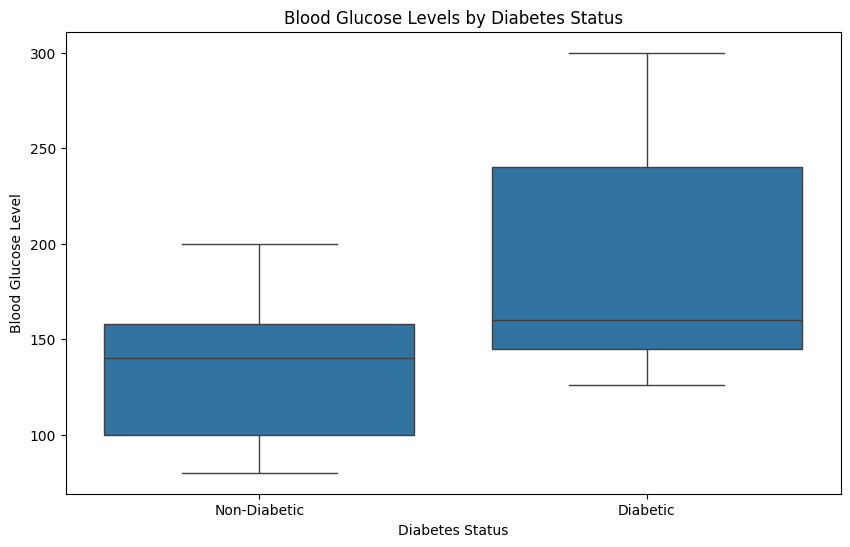

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

# Interpretation of the Graph Below:
#
# The boxplot displays two boxes, one for non-diabetic individuals and one for diabetic individuals, with whiskers extending from each box.
# Each box represents the interquartile range (IQR) of blood glucose levels within each category (non-diabetic and diabetic).
# The line inside each box represents the median value of blood glucose level for the respective diabetes status category.
# Values above the median for the non-diabetic category in the boxplot would indicate blood glucose levels higher than the median observed
# among non-diabetic individuals in the dataset.This suggests that there are some non-diabetic individuals with elevated blood glucose levels,
# which may indicate irregular glucose regulation or other health conditions.
#
# Similarly blood glucose levels below the median for the diabetic category suggest that this subset of diabetic individuals has relatively lower
# blood glucose levels compared to the median. Lower blood glucose levels in diabetic individuals may indicate better glycemic control or lower average blood glucose
# levels.



### 4.6 BMI Distribution plot

<ipython-input-24-ae0b3087fbd8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)


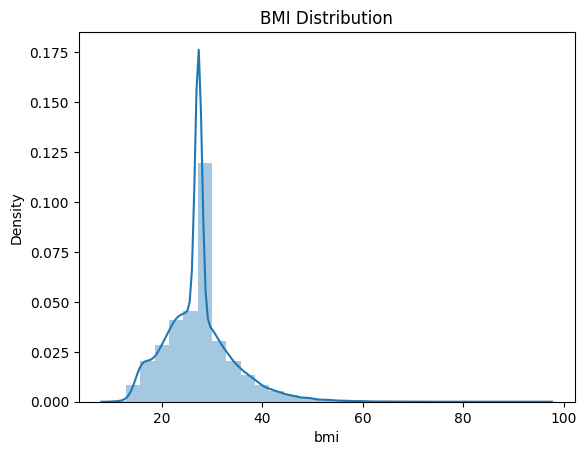

In [ ]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

### 4.7 BMI vs Diabetes plot

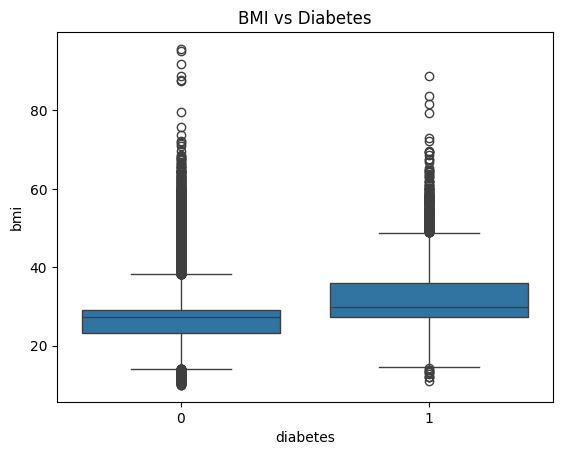

In [ ]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

# Interpretation of the Graph Below:
#
# Two boxes are present, one for non-diabetic individuals and one for diabetic individuals, with whiskers extending from each box.
# Each box represents the interquartile range (IQR) of BMI within each category (non-diabetic and diabetic).
# The line inside each box represents the median BMI value for the respective diabetes status category.
# Values above the median for the non-diabetic category in the boxplot indicate BMI levels higher than the median observed among
# non-diabetic individuals in the dataset. Elevated BMI levels in non-diabetic individuals may suggest overweight or obesity,
# which are known risk factors for developing type 2 diabetes.
# Conversely, BMI levels below the median for the diabetic category suggest that this subset of diabetic individuals has
# relatively lower BMI levels compared to the median.Lower BMI levels in diabetic individuals may indicate better
# weight management or control among diabetic individuals.
# Outliers in a boxplot are depicted as individual data points beyond the whiskers of the plot, indicating values that fall
# outside the typical range of the data distribution.

### 4.8 Age vs Diabetes plotting

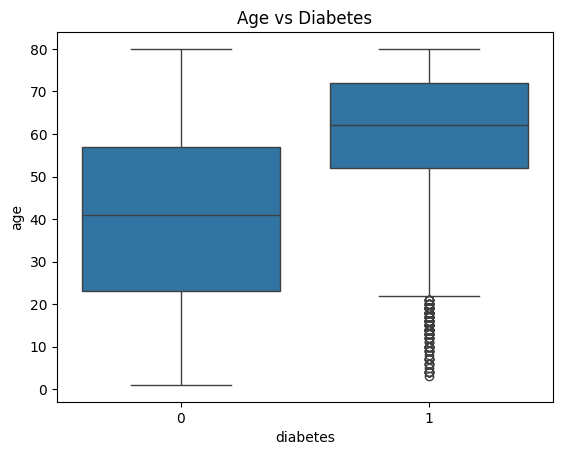

In [ ]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()


# Interpretation of the Graph Below:
#
# The boxplot "Age vs Diabetes" compares the distribution of age between non-diabetic and diabetic individuals.
# Two boxes are present, one for non-diabetic individuals and one for diabetic individuals, with whiskers extending from each box.
# Each box represents the interquartile range (IQR) of age within each category (non-diabetic and diabetic).
# The line inside each box represents the median age value for the respective diabetes status category.
# Values above the median for the non-diabetic category in the boxplot indicate ages higher than the median observed among non-diabetic
# individuals in the dataset. Elevated age levels in non-diabetic individuals may suggest older age groups,
# which might be associated with a higher risk of developing diabetes due to factors such as reduced physical activity
# and changes in hormone levels.
# Conversely, ages below the median for the diabetic category suggest that this subset of diabetic individuals has
# relatively younger ages compared to the median. Lower age levels in diabetic individuals may indicate younger onset
# of diabetes, which could be attributed to various factors such as genetic predisposition or lifestyle factors.
# Outliers in the boxplot represent individual age values that fall outside the range of the whiskers, indicating
# extreme age values that deviate significantly from the typical distribution within each diabetes status category.

### 4.9 Countplot Gender vs Diabetes

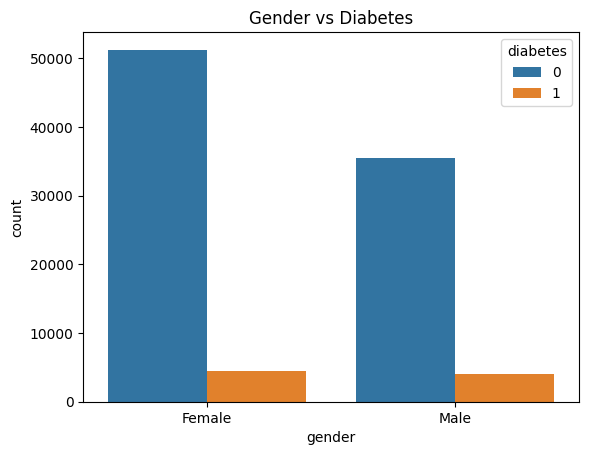

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

### 4.10 HbA1c level vs Diabetes boxplot

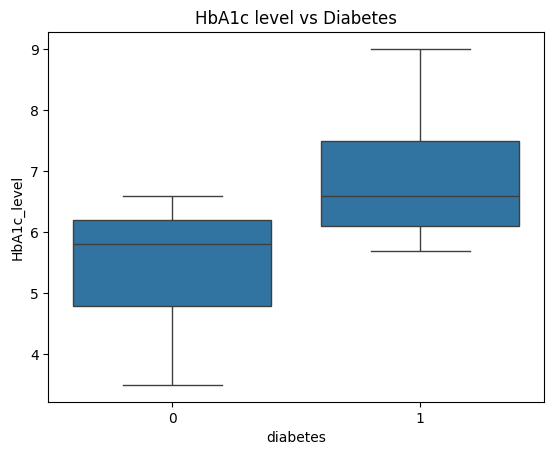

In [ ]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

### 4.11 Blood glucose level vs Diabetes boxplot

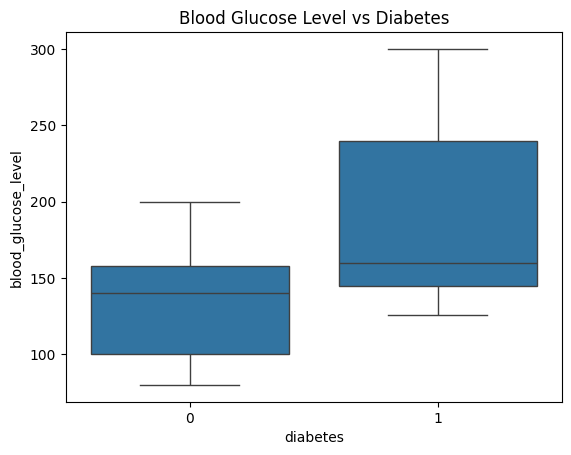

In [ ]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

### 4.12 Diabetic Cases by Gender

<Figure size 1000x600 with 0 Axes>

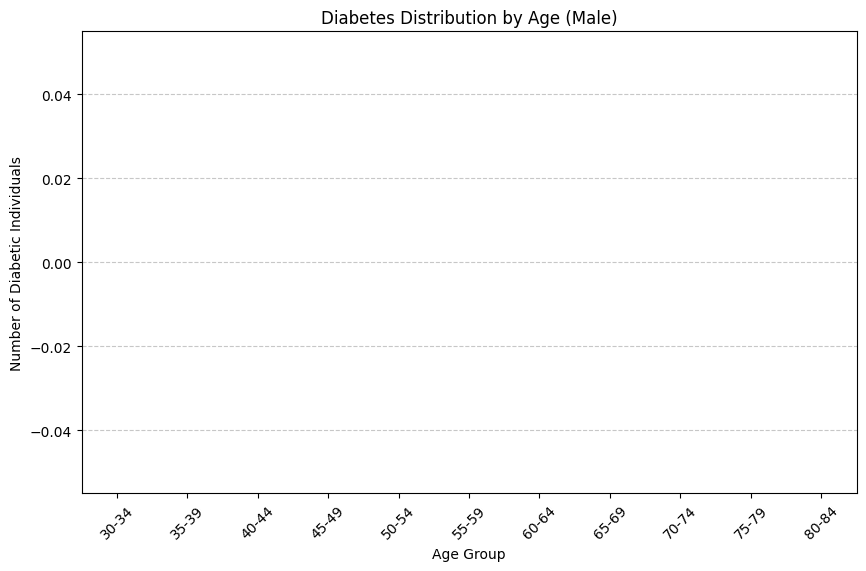

In [ ]:
# Filter diabetic males
diabetic_males = df[(df['gender'] == 1) & (df['diabetes'] == 1)]

# Plot
plt.figure(figsize=(10, 6))

age_diabetes_counts = diabetic_males.groupby('age')['diabetes'].sum()

df_copy = diabetic_males.copy()

# Bin ages into groups with a difference of 5
bins = list(range(30, 90, 5))
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Assign age groups to each record
df_copy['age_group'] = pd.cut(df_copy['age'], bins=bins, labels=labels, right=False)

# Group data by age group and count the number of diabetic individuals in each age group
age_diabetes_counts = df_copy.groupby('age_group')['diabetes'].sum()

# Plot
plt.figure(figsize=(10, 6))
age_diabetes_counts.plot(kind='bar', color='skyblue')
plt.title('Diabetes Distribution by Age (Male)')
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetic Individuals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

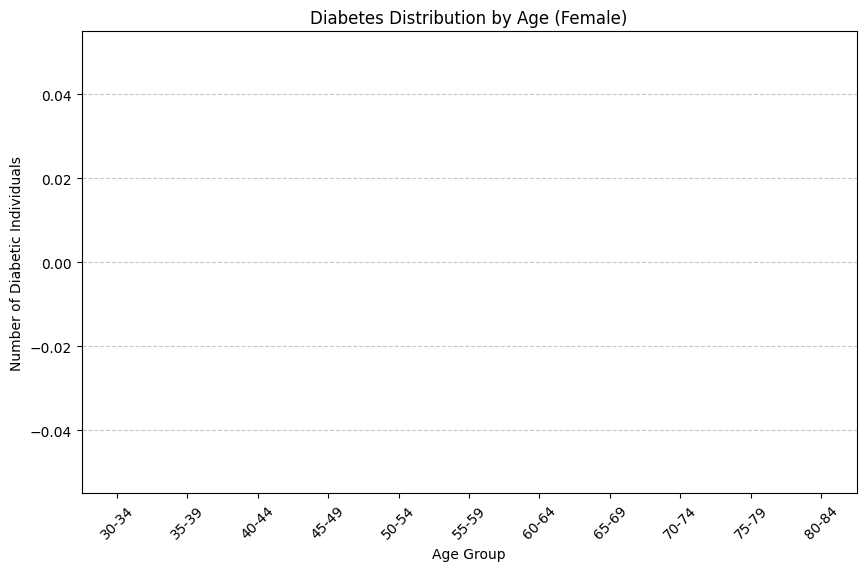

In [ ]:
# Filter diabetic males
diabetic_females = df[(df['gender'] == 0) & (df['diabetes'] == 1)]

# Plot
plt.figure(figsize=(10, 6))

age_diabetes_counts = diabetic_males.groupby('age')['diabetes'].sum()

df_female_copy = diabetic_females.copy()

# Bin ages into groups with a difference of 5
bins = list(range(30, 90, 5))
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Assign age groups to each record
df_female_copy['age_group'] = pd.cut(df_female_copy['age'], bins=bins, labels=labels, right=False)

# Group data by age group and count the number of diabetic individuals in each age group
age_diabetes_counts = df_female_copy.groupby('age_group')['diabetes'].sum()

# Plot
plt.figure(figsize=(10, 6))
age_diabetes_counts.plot(kind='bar', color='skyblue')
plt.title('Diabetes Distribution by Age (Female)')
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetic Individuals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **5. Feature Selection**

<ipython-input-32-61dd21737be6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


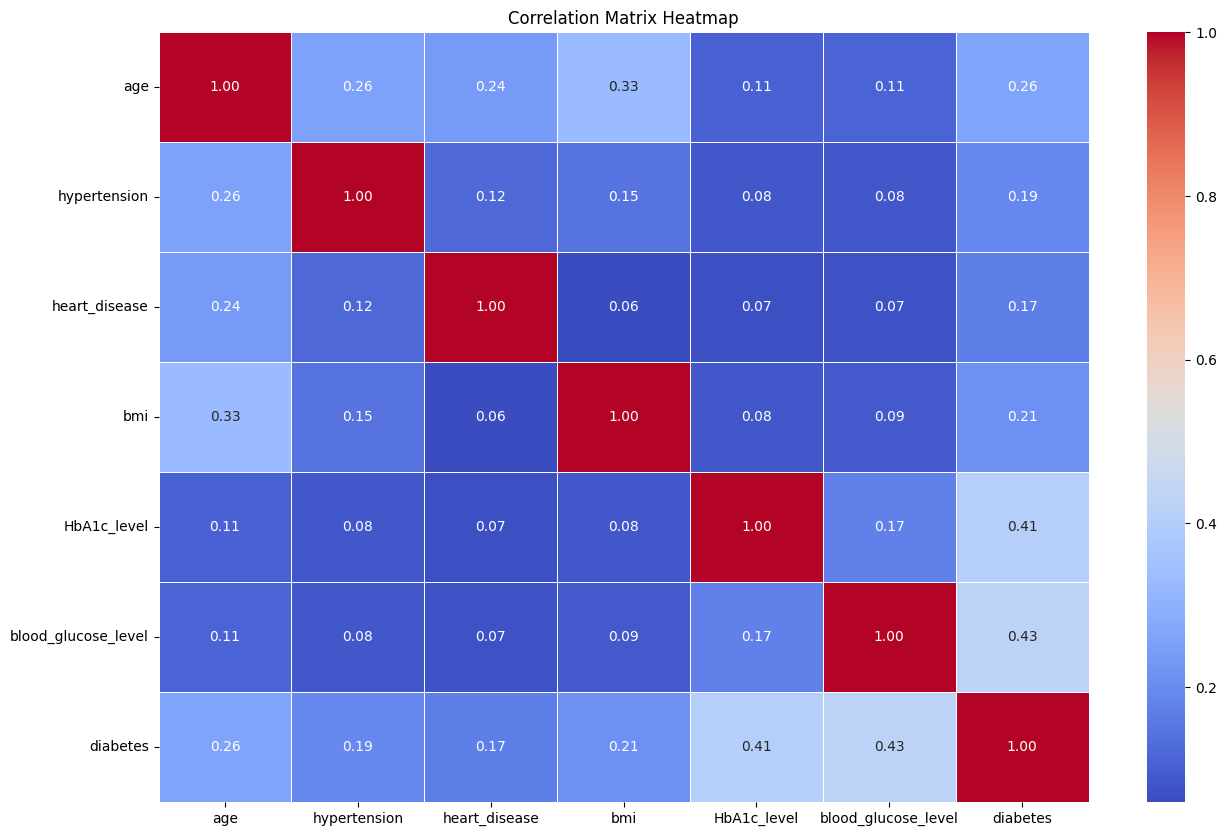

<ipython-input-32-61dd21737be6>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


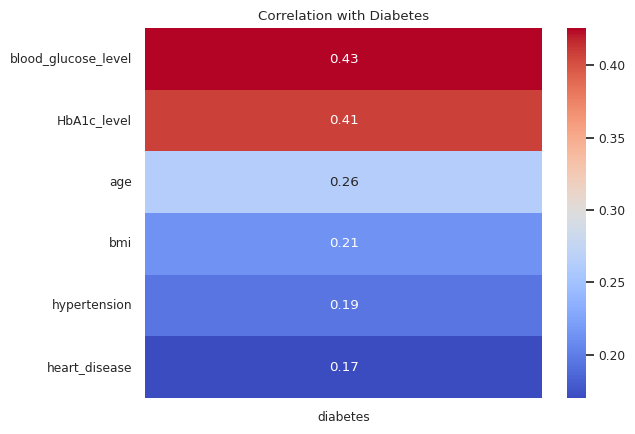

In [ ]:
# Compute the correlation matrix
data = df.copy()
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# **6. Data splitting (Training, Validation and Test)**

**5.1 One Hot Encoding**

In [ ]:
df['smoking_history']=df['smoking_history'].map({'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5})
df['gender']=df['gender'].map({'Female':0,'Male':1})

**5.2 Data Splitting**

In [ ]:
X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

# First, split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the training set further into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# **7. Models Comparison and Evaluation: Supervised Classification**

### **6.1. Logistic Regression**

In [ ]:

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

y_test_pred = model.predict(X_test)


# Classification report for Validation Dataset
val_classification_report = classification_report(y_val,y_val_pred)
print("Validation Classification Report : ")
print(val_classification_report)

# Classification report for Test Dataset
test_classification_report = classification_report(y_test,y_test_pred)
print("Test Classification Report : ")
print(test_classification_report)


Validation Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17347
           1       0.81      0.58      0.68      1692

    accuracy                           0.95     19039
   macro avg       0.89      0.79      0.83     19039
weighted avg       0.95      0.95      0.95     19039

Test Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17338
           1       0.81      0.59      0.68      1701

    accuracy                           0.95     19039
   macro avg       0.88      0.79      0.83     19039
weighted avg       0.95      0.95      0.95     19039



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **6.2. Decision Tree**

In [ ]:
# Initialize Decision Tree Classifier
decisionTree_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their values to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decisionTree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)
print("\n")

# Predict on the validation set using the best estimator
y_val_pred = best_estimator.predict(X_val)

# Calculate accuracy on the validation set
decisionTree_val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", decisionTree_val_accuracy)
print("\n")

# Predict on the test set using the best estimator
y_test_pred = best_estimator.predict(X_test)

# Calculate accuracy on the test set
decisionTree_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", decisionTree_test_accuracy)

# cm = confusion_matrix(y_test,y_test_pred)
# print("Confusion Matrix : ")
# print(cm)

# Classification report for Validation Dataset
val_classification_report = classification_report(y_val,y_val_pred)
print("Validation Classification Report : ")
print(val_classification_report)

# Classification report for Test Dataset
test_classification_report = classification_report(y_test,y_test_pred)
print("Test Classification Report : ")
print(test_classification_report)



Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=3, random_state=42)


Validation Accuracy: 0.9712169756814959


Test Accuracy: 0.9715321182835233
Validation Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17347
           1       1.00      0.68      0.81      1692

    accuracy                           0.97     19039
   macro avg       0.98      0.84      0.90     19039
weighted avg       0.97      0.97      0.97     19039

Test Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17338
           1       1.00      0.68      0.81      1701

    accuracy                           0.97     19039
   macro avg       0.98      0.84      0.90     19039
weighted avg       0.97      0.97      0.97     19039



In [ ]:
## Feature Importance
feature_importances = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values()
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

# **7. Performing SMOTE and re-evaluating Models**

In [ ]:
# Performing SMOTE
y = df['diabetes']
X = df.drop(columns = ['diabetes'])
# Initial class distribution
print("Class distribution before SMOTE:")
print(y.value_counts())

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y).value_counts())

Class distribution before SMOTE:
0    86712
1     8482
Name: diabetes, dtype: int64

Class distribution after SMOTE:
0    86712
1    86712
Name: diabetes, dtype: int64


### **7.1. New instance distribution**

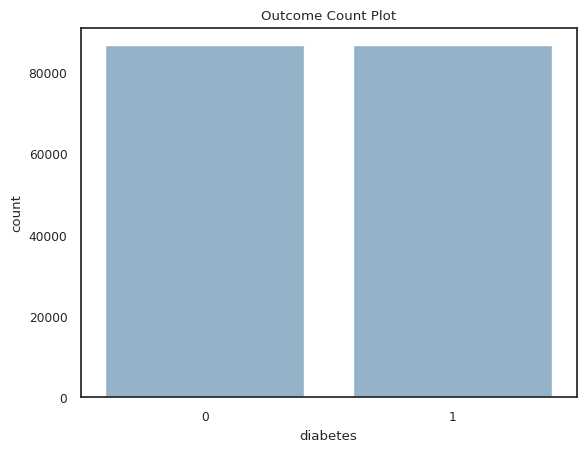

In [ ]:
df = pd.concat([X, y], axis=1)

sns.countplot(x='diabetes', data=df)
plt.title('Outcome Count Plot')
plt.show()

## **7.2. Check for null values**

In [ ]:
# Checking null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## **7.3. Check and remove duplicate values**

In [ ]:
# Checking duplicate values and remove it
print(f"No. of Duplicates in the Dataset : {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"No. of Duplcate rows after deleting duplicate rows: {df.duplicated().sum()}")

No. of Duplicates in the Dataset : 1012
No. of Duplcate rows after deleting duplicate rows: 0


In [ ]:
# df['smoking_history']=df['smoking_history'].map({'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5})
# df['gender']=df['gender'].map({'Female':0,'Male':1})



X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

# First, split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the training set further into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,1,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,1,27.32,5.7,158,0
3,0,36,0,0,3,23.45,5.0,155,0
4,1,76,1,1,3,20.14,4.8,155,0


In [ ]:

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

print(X_train.isna().sum())

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

y_test_pred = model.predict(X_test)


# Classification report for Validation Dataset
val_classification_report = classification_report(y_val,y_val_pred)
print("Validation Classification Report : ")
print(val_classification_report)

# Classification report for Test Dataset
test_classification_report = classification_report(y_test,y_test_pred)
print("Test Classification Report : ")
print(test_classification_report)


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     17261
           1       0.89      0.88      0.89     17222

    accuracy                           0.89     34483
   macro avg       0.89      0.89      0.89     34483
weighted avg       0.89      0.89      0.89     34483

Test Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     17357
           1       0.88      0.88      0.88     17126

    accuracy                           0.88     34483
   macro avg       0.88      0.88      0.88     34483
weighted avg       0.88      0.88      0.88     34483



In [ ]:
# Initialize Decision Tree Classifier
decisionTree_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their values to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decisionTree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)
print("\n")

# Predict on the validation set using the best estimator
y_val_pred = best_estimator.predict(X_val)

# Calculate accuracy on the validation set
decisionTree_val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", decisionTree_val_accuracy)
print("\n")

# Predict on the test set using the best estimator
y_test_pred = best_estimator.predict(X_test)

# Calculate accuracy on the test set
decisionTree_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", decisionTree_test_accuracy)

# cm = confusion_matrix(y_test,y_test_pred)
# print("Confusion Matrix : ")
# print(cm)

# Classification report for Validation Dataset
val_classification_report = classification_report(y_val,y_val_pred)
print("Validation Classification Report : ")
print(val_classification_report)

# Classification report for Test Dataset
test_classification_report = classification_report(y_test,y_test_pred)
print("Test Classification Report : ")
print(test_classification_report)



Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Estimator: DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)


Validation Accuracy: 0.9698112113215207


Test Accuracy: 0.9694632137575037
Validation Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17261
           1       0.98      0.96      0.97     17222

    accuracy                           0.97     34483
   macro avg       0.97      0.97      0.97     34483
weighted avg       0.97      0.97      0.97     34483

Test Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17357
           1       0.97      0.97      0.97     17126

    accuracy                           0.97     34483
   macro avg       0.97      0.97      0.97     34483
weighted avg       0.97      0.97      0.97     34483

